# Select using the database

We can restrict the amount of data downloaded by using further selections.

In this case we will use the function fGetNearbyObjEq to make a cone search and impose a selection on redshift based on the distance from the cluster center.

In [73]:
from astroquery.sdss import SDSS
from astroquery.ipac.ned import Ned
import numpy as np

ned = Ned.query_object("Coma Cluster")
ra, dec = ned['RA'].value[0], ned['DEC'].value[0]
radius = 10*60
z0 = 0.0231


query_base = """SELECT 
s.ra ,s.dec, s.z, sn.distance
FROM
SpecPhotoAll as s
JOIN dbo.fGetNearbyObjEq({ra},{dec},{radius}) AS sn
ON s.objID = sn.objID
WHERE
s.z < 0.0231 + 0.009 - sn.distance * 1.16e-05
AND
s.z > 0.0231 - 0.009 + sn.distance * 1.16e-05
ORDER BY sn.distance
"""

query = query_base.format(ra=ra, dec=dec, radius=radius)
res = SDSS.query_sql(query, timeout=400)
try:
    print('Table with ', len(res),' lines')
except:
    print('No results')

Table with  2695  lines


In [74]:
res

ra,dec,z,distance
float64,float64,float64,float64
194.94492,27.97385,0.03141962,0.606778912238036
194.94492,27.97385,0.03143205,0.606778912238036
194.94556,27.991918,0.02803823,0.764397710586345
194.94556,27.991918,0.0280615,0.764397710586345
194.93219,27.994691,0.02225102,1.37502174008693
194.93419,27.958417,0.02305106,1.68269271544503
194.93419,27.958417,0.02303317,1.68269271544503
194.9178,27.968237,0.02527304,2.01683342103923
194.90966,27.987198,0.02273988,2.32678647472179


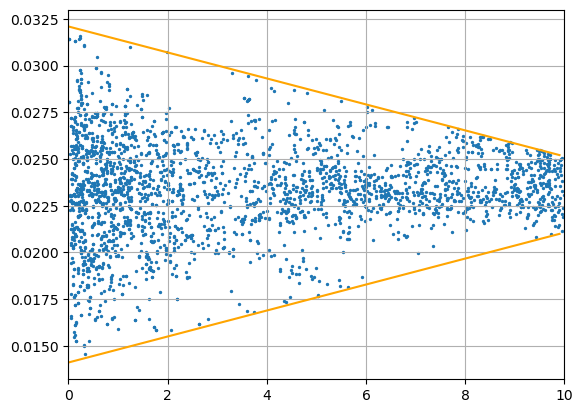

In [75]:
import matplotlib.pyplot as plt

plt.scatter(res['distance']/60, res['z'],s=2)
x = np.arange(0,10,0.1) * 60
y = 0.009 - x * 1.16e-05
plt.plot(x/60, z0+y, color='orange')
plt.plot(x/60, z0-y, color='orange')
plt.xlim(0,10)
plt.grid()
plt.show()

## Exercise

Use the same query as before but this time do not use the line but two limits in z for distances < 3 degs (0.0150 < z < 0.03) and for distances >= 3 degs (0.021<z<0.026)

You will have to use OR to specify the conditions.

In [48]:
from astroquery.sdss import SDSS
from astroquery.ipac.ned import Ned
import numpy as np

ned = Ned.query_object("Coma Cluster")
ra, dec = ned['RA'].value[0], ned['DEC'].value[0]
radius = 10*60
z0 = 0.0231

query_base = """SELECT 
s.ra ,s.dec, s.z, sn.distance
FROM
SpecPhotoAll as s
JOIN dbo.fGetNearbyObjEq({ra},{dec},{radius}) AS sn
ON s.objID = sn.objID
WHERE
sn.distance < 3*60 and s.z > 0.0150 and s.z < 0.03
OR 
sn.distance >= 3*60 and s.z > 0.021 and s.z < 0.026
ORDER BY sn.distance
"""

query = query_base.format(ra=ra, dec=dec, radius=radius)
res = SDSS.query_sql(query, timeout=400)
try:
    print('Table with ', len(res),' lines')
except:
    print('No results')

Table with  2523  lines


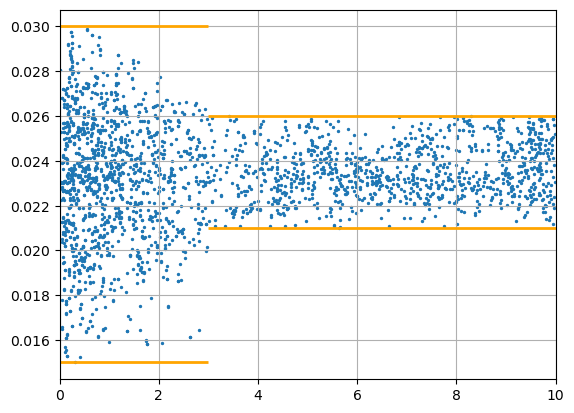

In [54]:
import matplotlib.pyplot as plt

plt.scatter(res['distance']/60, res['z'],s=2)
x = np.arange(0,10,0.1) * 60
y = 0.009 - x * 1.16e-05
plt.hlines(y=0.015, xmin=0, xmax=3, linewidth=2, color='orange')
plt.hlines(y=0.030, xmin=0, xmax=3, linewidth=2, color='orange')
plt.hlines(y=0.021, xmin=3, xmax=10, linewidth=2, color='orange')
plt.hlines(y=0.026, xmin=3, xmax=10, linewidth=2, color='orange')
plt.xlim(0,10)
plt.grid()
plt.show()

# Joining tables

We will show an example (BTP diagram, from Baldwin, Phillips & Terlevich) for a selection of galaxies in the SDSS archive where we link two tables: spectroscopy and spectral lines.

In [61]:
# Selection on line fluxes

query="""SELECT
TOP 10000
s.plate, s.fiberid, s.mjd, s.z, s.zwarning,s.class,
g.h_beta_flux, g.h_beta_flux_err,
g.h_alpha_flux, g.h_alpha_flux_err,
g.oiii_5007_flux,g.nii_6584_flux
FROM GalSpecLine AS g
JOIN SpecObj AS s
ON s.specobjid = g.specobjid
WHERE
h_alpha_flux > h_alpha_flux_err*5
AND h_beta_flux > h_beta_flux_err*5
AND h_beta_flux > 0
AND h_alpha_flux > h_alpha_flux_err*5
AND h_alpha_flux > 0
AND nii_6584_flux > nii_6584_flux_err*5
AND oiii_5007_flux > oiii_5007_flux_err*5
AND s.class = 'GALAXY'
AND s.zwarning = 0
"""
res = SDSS.query_sql(query, timeout=400)
print('Objects: ', len(res))

Objects:  10000


In [65]:
res

plate,fiberid,mjd,z,zwarning,class,h_beta_flux,h_beta_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,nii_6584_flux
int64,int64,int64,float64,int64,str6,float64,float64,float64,float64,float64,float64
266,616,51630,0.02013125,0,GALAXY,116.5431,3.381064,473.6742,4.980221,105.9001,128.7748
266,625,51630,0.06260023,0,GALAXY,29.06633,2.158391,122.8106,2.473173,28.77853,30.25807
266,626,51630,0.08605687,0,GALAXY,17.67595,2.309391,74.91304,2.266917,14.21761,49.63749
266,632,51630,0.09284572,0,GALAXY,27.12378,2.310349,98.09557,2.536072,17.24143,44.43774
266,638,51630,0.02016207,0,GALAXY,794.5548,9.272701,2891.112,21.44574,626.6895,740.2675
266,640,51630,0.0199993,0,GALAXY,35.98272,2.847867,113.3372,2.1309,25.72125,23.59425
267,1,51608,0.04655848,0,GALAXY,74.67915,2.687029,212.5971,3.508145,104.2611,42.20855
267,3,51608,0.09342866,0,GALAXY,24.16568,4.469627,121.1885,5.431174,34.30636,133.5011
267,8,51608,0.08627161,0,GALAXY,64.29639,4.022976,266.537,5.180221,27.43689,123.455


In [67]:
halpha = res['h_alpha_flux'].value
hbeta = res['h_beta_flux'].value
nii = res['nii_6584_flux'].value
oiii = res['oiii_5007_flux'].value
oclass = res['class'].value

/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_31856/4293851857.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')


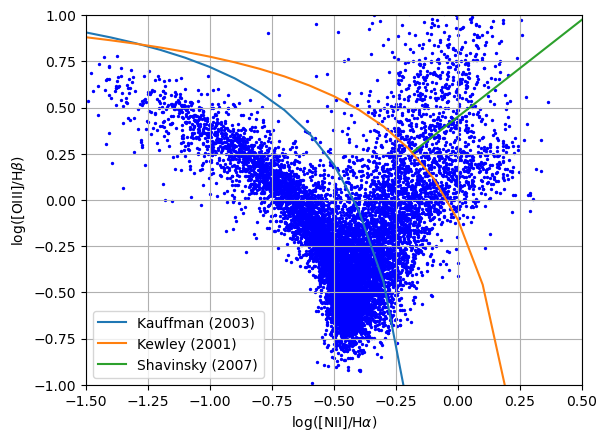

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
plt.xlim(-1.5,0.5)
plt.ylim(-1.,1.)
x=np.arange(-1.5,0.0,0.1)
plt.plot(x, 0.61/(x-0.05)+1.3,label='Kauffman (2003)')
x=np.arange(-1.5,0.5,0.1)
plt.plot(x, 0.61/(x-0.47)+1.19,label='Kewley (2001)')
x=np.arange(-0.18,0.7,0.1)
plt.plot(x, 1.05*x+0.45,label='Shavinsky (2007)')
plt.xlabel('log([NII]/H$\\alpha$)')
plt.ylabel('log([OIII]/H$\\beta$)')
plt.legend()
plt.grid()

In [70]:
# Define a function

def plotBPT(halpha, hbeta, nii, oiii):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()
    plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
    plt.xlim(-1.5,0.5)
    plt.ylim(-1.,1.)
    x=np.arange(-1.5,0.0,0.1)
    plt.plot(x, 0.61/(x-0.05)+1.3,label='Kauffman (2003)')
    x=np.arange(-1.5,0.5,0.1)
    plt.plot(x, 0.61/(x-0.47)+1.19,label='Kewley (2001)')
    x=np.arange(-0.18,0.7,0.1)
    plt.plot(x, 1.05*x+0.45,label='Shavinsky (2007)')
    plt.xlabel('log([NII]/H$\\alpha$)')
    plt.ylabel('log([OIII]/H$\\beta$)')
    plt.legend()
    plt.grid()
    plt.show()
    return fig, ax    

/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_31856/1389559933.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')


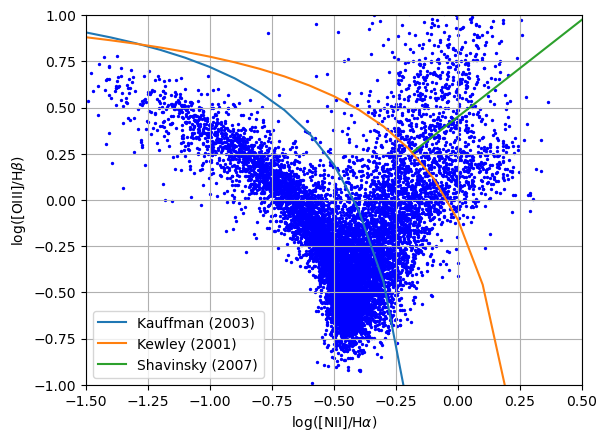

In [72]:
fig, ax = plotBPT(halpha, hbeta, nii, oiii)

### Exercise

1. Save function in a file called utils.py
2. Import the function as:  from utils import plotBPT
3. Run the command again

/Users/dfadda/Carpentry/AstronomicalData/notebooks/utils.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
/Users/dfadda/Carpentry/AstronomicalData/notebooks/utils.py:10: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
/Users/dfadda/Carpentry/AstronomicalData/notebooks/utils.py:10: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')


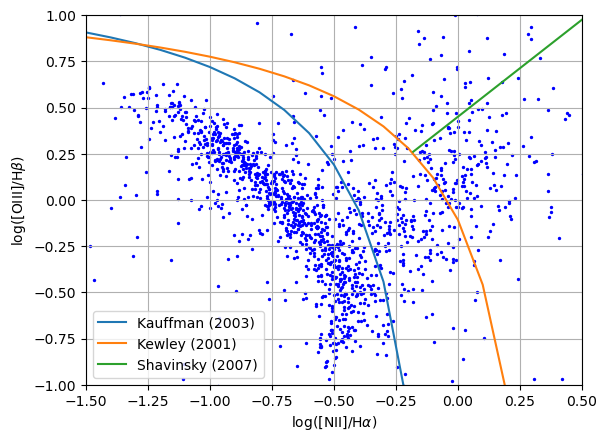

Signature: plotBPT(halpha, hbeta, nii, oiii)
Docstring:
Plot a BPT diagram
Input: Halpha, Hbeta, [NII], and [OIII] fluxes
File:      ~/Carpentry/AstronomicalData/notebooks/utils.py
Type:      function

In [82]:
from utils import plotBPT

?plotBPT
fig, ax = plotBPT(halpha, hbeta, nii, oiii)

## Exercise

Do the research on lines for the Coma cluster with the same limits as in the example before.
Then plot the BPT diagram.

In [77]:
from astroquery.sdss import SDSS
from astroquery.ipac.ned import Ned
import numpy as np

ned = Ned.query_object("Coma Cluster")
ra, dec = ned['RA'].value[0], ned['DEC'].value[0]
radius = 10*60
z0 = 0.0231

query_base = """SELECT 
s.ra ,s.dec, s.z, sn.distance, 
g.h_beta_flux, g.h_beta_flux_err,
g.h_alpha_flux, g.h_alpha_flux_err,
g.oiii_5007_flux,g.nii_6584_flux
FROM
SpecPhotoAll as s
JOIN dbo.fGetNearbyObjEq({ra},{dec},{radius}) AS sn
ON s.objID = sn.objID
JOIN GalSpecLine AS g
ON s.specobjid = g.specobjid
WHERE
sn.distance < 3*60 and s.z > 0.0150 and s.z < 0.03
OR 
sn.distance >= 3*60 and s.z > 0.021 and s.z < 0.026
AND h_alpha_flux > h_alpha_flux_err*5
AND h_beta_flux > h_beta_flux_err*5
AND h_beta_flux > 0
AND h_alpha_flux > h_alpha_flux_err*5
AND h_alpha_flux > 0
AND nii_6584_flux > nii_6584_flux_err*5
AND oiii_5007_flux > oiii_5007_flux_err*5
AND s.class = 'GALAXY'
AND s.zwarning = 0
"""

query = query_base.format(ra=ra, dec=dec, radius=radius)
res = SDSS.query_sql(query, timeout=400)
print('Number of galaxies: ', len(res))

/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_31856/1389559933.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_31856/1389559933.py:8: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')
/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_31856/1389559933.py:8: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(nii/halpha), np.log10(oiii/hbeta),s=2,color='blue')


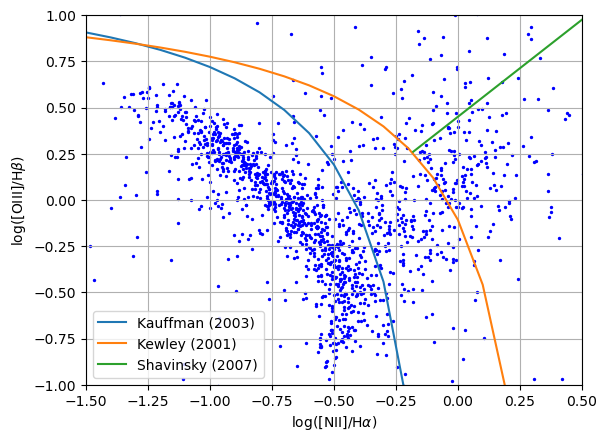

In [79]:
halpha = res['h_alpha_flux'].value
hbeta = res['h_beta_flux'].value
nii = res['nii_6584_flux'].value
oiii = res['oiii_5007_flux'].value
fig, ax = plotBPT(halpha, hbeta, nii, oiii)

## Save results in HDF5 file

In [81]:
import pandas as pd

coma_df = res.to_pandas()
filename = 'coma_lines.hdf'
coma_df.to_hdf(filename, key='coma_df')